In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

from numpy import argmax
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_jsons"

In [5]:
%cd /content/drive/MyDrive/kaggle_jsons

/content/drive/MyDrive/kaggle_jsons


In [6]:
!ls

creditcard.csv	kaggle.json


In [8]:
data = pd.read_csv("/content/drive/MyDrive/kaggle_jsons/creditcard.csv")

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
#printing the shape of the data 
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [14]:
data.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:

# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [16]:
#the data set is unblanced so we use a preprocessing technique called over smapling to balance the dataset 
from imblearn.over_sampling import SMOTE 
xData, yData = SMOTE().fit_resample(xData, yData)
xData.shape

(568630, 30)

In [17]:
# our features are floats and a sclaing should help us about that.
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(xData)

StandardScaler()

In [18]:
xData = scaler.transform(xData)

In [19]:
xData.shape


(568630, 30)

In [20]:
pd.DataFrame(xData).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.824366,0.205045,-0.547350,1.004999,-0.302006,0.312675,0.693087,0.555880,-0.038686,0.762732,...,0.064959,-0.147836,0.248341,-0.103391,0.226289,0.164731,-0.486070,0.052564,-0.150367,0.242607
1,-1.824366,0.673077,-0.453986,0.620027,-0.598111,0.409006,0.373495,0.499922,-0.041443,0.483927,...,-0.247053,-0.221262,-0.542676,0.106535,-0.526228,0.227707,0.217596,-0.097513,-0.064837,-0.422379
2,-1.824345,0.205312,-0.896470,0.881031,-0.619881,0.272802,1.478126,0.652868,-0.008473,-0.083052,...,0.331285,-0.053587,0.674564,0.907653,-1.172667,-0.578931,-0.374339,-0.146335,-0.242881,1.279211
3,-1.824345,0.277228,-0.578325,0.884245,-1.015664,0.391999,1.153520,0.555530,0.017843,-0.025585,...,-0.382330,-0.179686,0.013098,-0.182546,-2.072293,1.010533,-0.559369,-0.022016,0.046885,0.124391
4,-1.824325,0.242018,-0.285515,0.844564,-0.612477,0.296019,0.478089,0.617979,-0.113567,0.967128,...,0.217930,-0.144695,0.697521,-0.130142,0.363813,-0.380647,1.058391,0.142968,0.414314,-0.117788


In [21]:
#shuffling the data for randomization 
from sklearn.utils import shuffle
xData, yData = shuffle(xData, yData)

In [22]:

# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [41]:
#model architecture 
model = Sequential()
model.add(Dense(1, input_dim = 30, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True,)

history= model.fit(
      xTrain,
      yTrain,
      epochs=100,
      shuffle=True,
      validation_data=(xTest, yTest),verbose=1,
      callbacks=[callback]
    )


Epoch 1/100
14216/14216 [==============================] - 29s 2ms/step - loss: 0.1139 - accuracy: 0.9578 - val_loss: 0.0840 - val_accuracy: 0.9695
Epoch 2/100
14216/14216 [==============================] - 30s 2ms/step - loss: 0.0791 - accuracy: 0.9716 - val_loss: 0.0781 - val_accuracy: 0.9718
Epoch 3/100
14216/14216 [==============================] - 30s 2ms/step - loss: 0.0751 - accuracy: 0.9733 - val_loss: 0.0750 - val_accuracy: 0.9738
Epoch 4/100
14216/14216 [==============================] - 30s 2ms/step - loss: 0.0729 - accuracy: 0.9743 - val_loss: 0.0729 - val_accuracy: 0.9743
Epoch 5/100
14216/14216 [==============================] - 31s 2ms/step - loss: 0.0713 - accuracy: 0.9751 - val_loss: 0.0715 - val_accuracy: 0.9749
Epoch 6/100
14216/14216 [==============================] - 30s 2ms/step - loss: 0.0702 - accuracy: 0.9756 - val_loss: 0.0705 - val_accuracy: 0.9755
Epoch 7/100
14216/14216 [==============================] - 28s 2ms/step - loss: 0.0694 - accuracy: 0.9761 - val_

In [42]:
yPred = model.predict(xTest)
yPred

3554/3554 [==============================] - 4s 1ms/step


array([[1.        ],
       [0.00400488],
       [0.11459436],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

In [44]:
print(yPred[100])
print(yTest[100])
print("__________________")
print(yPred[0])
print(yTest[0])


[0.01871654]
0
__________________
[1.]
1


In [45]:
#selection a threshold 

c1 = 0
c2 = 0
for i in range(0, len(yPred)):
  if yTest[i] == 1:
    c1+=1
  elif yTest[i] == 0:
    c2+=1

print(f'{c1} {c2}')


56718 57008


In [46]:
#selection a threshold 
cnt1 = 0
cnt2 = 0
for i in range(0, len(yPred)):
  if yPred[i] >= 0.5:
    cnt1+=1
  else:
    cnt2+=1

print(f'{cnt1} {cnt2}')


55364 58362


In [47]:

for i in range(0, len(yPred)):
  if yPred[i] >= 0.5:
    yPred[i] = 1
  else:
    yPred[i] = 0


In [49]:
#Roc curve 
#prediction probablitlies true positives , false positives 


#values of the worst case scenario 
r_probs = [0 for _ in range(len(yTest))]

#contains the values of predictions using the logestic regression model 
lg_probs = model.predict(xTest)

3554/3554 [==============================] - 4s 1ms/step


In [50]:
#keeping the positive probabilities 
flag = 0
for item in lg_probs:
  if item < 0:
    flag = 1
print(flag) 

0


In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
#calculating auroc curve
r_auc = roc_auc_score(yTest, r_probs)
lg_auc = roc_auc_score(yTest,lg_probs) 

In [53]:
print('Logesic regression AUROC =  %.3f' % (lg_auc))
print('Logesic regression AUROC =  %.3f' % (r_auc))

Logesic regression AUROC =  0.997
Logesic regression AUROC =  0.500


In [54]:
#calculate ROC curve 
#false positive array, true positive array 
r_fpr, r_tpr, _ = roc_curve(yTest, r_probs)
lg_fpr, lg_tpr, _ = roc_curve(yTest, lg_probs)


In [55]:
#Plotting the curve 
import matplotlib.pyplot as plt


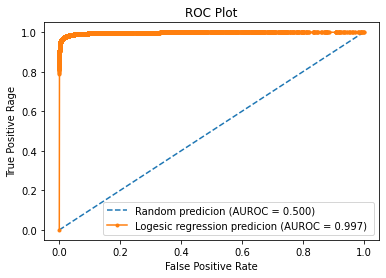

In [56]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random predicion (AUROC = %0.3f) ' % r_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logesic regression predicion (AUROC = %0.3f) ' % lg_auc)
#title 
plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rage')
plt.legend()
plt.show()


In [57]:
#confustion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(yTest, yPred)


array([[56459,   549],
       [ 1903, 54815]])

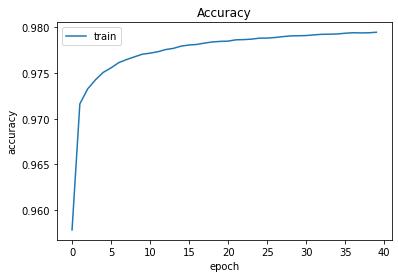

In [61]:
#plotting accuracy 
# history في الموديل الجاهز مفهاش هيستوري 

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

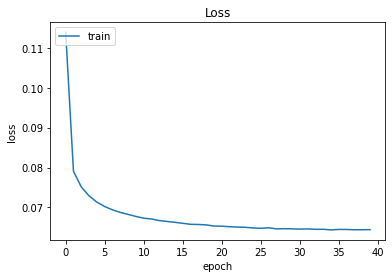

In [62]:
#plotting accuracy 
# history في الموديل الجاهز مفهاش هيستوري 

plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'], loc='upper left')
plt.show()